In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy.stats import linregress
#Ajustement linéaire
from scipy.optimize import curve_fit
#Ajustement exponentiel

In [2]:
#Permet de connaitre la droite d'evolution lineaire a*x+b selon 1 dico (année : valeur)
def evolution_lineaire_dico (D, annee_fin):
    """dict[int:int] * int -> dict[int:float]"""
    #a1 : number, b1 : number, i : int, a : float, b : float, newlistex : list[int], rho : float,x : float, y : float
    #k : int, v : int
    liste2=[]
    newlistex=[]
    i = 0
    for k in D : 
        i = i+1
        newlistex.append(i)
        liste2.append(D[k])
        
    a1 = np.array(newlistex)
    b1 = np.array(liste2)
    (a,b,rho,x,y)= linregress(a1,b1)
    
    #k int, v : number, donnee : dict[int:float]
    k = 0
    j = annee_fin
    donnee = dict()
    while j > 0 : 
        k = k +1 
        donnee[k] = round((a*k)+b, 2)
        if (donnee[k] < 0 and (a*k)< 0) :
            print("La derniere année est",k+2018)
            return donnee
        
        j = j-1
    return donnee
        

In [3]:
#Permet de connaitre la droite d'evolution expo selon 1 dico (année : valeur)
def evolution_expo_dico (D, annee_fin):
    """dict[int:int] * int -> dict[int:float]
    Hyp : Adapter à partir d'une regression lineaire"""
    #a1 : number, b1 : number, i : int, a : float, b : float, newlistex : list[int], rho : float,x : float, y : float
    #k : int, v : int
    liste2=[]
    newlistex=[]
    temp = 0
    i = 0
    for k in D : 
        i = i+1
        newlistex.append(i)
        liste2.append(D[k])
        temp = i+1 
        
        
    a1 = np.array(newlistex)
    b1 = np.log(liste2)
    (a,b,rho,x,y)= linregress(a1,b1)
    
    #k int, v : number, donnee : dict[int:float]
    k = temp
    j = annee_fin
    donnee = dict()
    while j > 0 : 
        
        donnee[k] = round(np.exp(a*k)*np.exp(b),2)
        if (donnee[k] < 0 and (a*k)< 0) :
            print("La derniere année est",k)
            return donnee
        k=k+1
        j = j-1
    return donnee
        

In [4]:
def evolution_expo_dico_2 (D, annee_fin):
    """dict[int:int] * int -> dict[int:float]
    Hyp : Adapter à partir de la fonction polytfit de numpy"""
    #a1 : number, b1 : number, i : int, a : float, b : float, newlistex : list[int], rho : float,x : float, y : float
    #k : int, v : int
    liste2=[]
    newlistex=[]
    temp = 0
    i = 0
    for k in D : 
        i = i+1
        newlistex.append(i)
        liste2.append(D[k])
        temp = k+1 
        temp2 = i+1
        
        
    x = np.array(newlistex)
    y = np.log(liste2)
    (a,b) = np.polyfit(x, y,1)
    
    #k int, v : number, donnee : dict[int:float]
    k = 1
    j = annee_fin
    donnee = dict()
    while j > 0 : 
        donnee[k] = round(np.exp(a*k)*np.exp(b),2)
        k=k+1
        temp2 = temp2 +1
        j = j-1
    return donnee


In [5]:
#Renvoi un dico de l'evolution a*x+b (valeur) selon l'année (clé)
def ratio(D_humain, D_robot) : 
    """dict[int:float] * dict[int:float] -> dict[int : float]"""
    # k : int, v : float, a : int, b : float, c : float, D3 : dict[int:float]
    c = 0
    D3 = dict() 
    for k in D_humain : 
        for a in D_robot: 
            if (a == k) : 
                c=D_robot[a]/D_humain[k]
                D3[a] = c 
    return D3 

In [6]:
#Fonction plot a partir de dico

def dico_to_graphic (D) : 
    """dict[int:float] * annee_ref 
    Hyp : annee_ref = derniere année prise pour les données de reference"""
    #Lx : list[int], Ly : list[float], k : int, v : valeur
    Lx = []
    Ly = []
    for k in D: 
        Lx.append(k) 
        Ly.append(D[k])
        
    plt.plot(Lx,Ly)
    plt.xlabel("Annee")
    plt.ylabel("% de places des robots")
    plt.show()

def deux_dico_to_graphic(Dico_robot,Dico_humain,annee_ref) : 
    Lx1 = [] 
    Lx2 = []
    Ly1 = []
    Ly2 = []
    
    for k in Dico_robot: 
        Lx1.append(k+annee_ref) 
        Ly1.append(Dico_robot[k])
    for k in Dico_humain: 
        Lx2.append(k+annee_ref) 
        Ly2.append(Dico_humain[k])
    
    i=0
    temp = 0
    condition1 = True
    while (condition1):
        if Ly1[i] >= Ly2[i] : 
            condition1= False
        i=i+1
    i=i-1 
    
    # 1 : robot et 2 : humain 
    print("L'intersection se situe en ",(i+annee_ref))
    plt.plot(Lx2,Ly2, label='Humain')
    plt.plot(Lx1,Ly1, label = 'Robot')
    plt.legend(loc='lower right')
    plt.xlabel("Annee")
    plt.ylabel("Places")
    plt.show()

    

In [7]:
def decroi_lineaire_to_expo(dlineaire,dexpo) : 
    """Fonction lineaire decroissante et exponentielle croissante
    A l'intersection des deux courbes la décroisssance se fait au rythme de la fonction exponentielle
    Mais adaptable a n'importe quelle fonction croissante et decroissante 
    A condition que le premier terme de la decroissante soit superieur à celui de la croissante"""
    lineairex = []
    lineairey = []
    expox = []
    expoy=[]
    
    for k in dlineaire: 
        lineairex.append(k) 
        lineairey.append(dlineaire[k])
    for k in dexpo : 
        expox.append(k)
        expoy.append(dexpo[k])
    
    new_expoy = []
    new_expox = []
    temp = len(expox)
    if (len(expox) < len(lineairex)) :
        temp = len(lineairex)
    
    i = 0
    difference = 0.0 
    condition1 = True
    while ((i < temp)and condition1) : 
        if (lineairey[i] <= 0):
            condition1= False
        if (lineairey[i] <= expoy[i] and condition1) :
            difference = expoy[i+1] - expoy[i]
            lineairey[i+1] = lineairey[i] - difference
        if condition1 : 
            new_expoy.append(expoy[i])
            new_expox.append(expox[i])
            i=i+1
    j=0
    
    #Transforme les listes en dico 
    j=0
    dlin = dict()
    dexp = dict()
    
    i = 0 
    
    while (lineairey[i] > 0 ) : 
        dlin[lineairex[i]] = lineairey[i]
        dexp[new_expox[i]] = new_expoy[i]
        i = i +1
    return (dlin,dexp)

In [8]:
def annees_ratio(D):
    """dict[int:float] -> """
    #k : int, v : float
    #annee_depart : int, annee_milieu : int, annee_fin : int, compt : int, boole : bool
    longueur_dico = len(D)-1
    compt = 0
    boole = True
    boole2 = True
    annee_milieu = 0
    annee_fin = 0 
    for k,v in D.items(): 
        if (boole2 == True) : 
            annee_depart = k 
            boole2 = False
        if (compt == longueur_dico) : 
            annee_fin = k 
        if (v > 0.5 and boole == True) : 
            annee_milieu = k 
            boole = False
        compt = compt +1 
    print("En",annee_depart+2000,"le ratio est de",abs(D[annee_depart]))
    print("En",annee_milieu+2018,"le ratio est de", abs(D[annee_milieu]))
    print("En",annee_fin+2000,"le ratio est de 1")
        

In [9]:
def evolution_expo_dico_2 (D, annee_fin):
    """dict[int:int] * int -> dict[int:float]"""
    #a1 : number, b1 : number, i : int, a : float, b : float, newlistex : list[int], rho : float,x : float, y : float
    #k : int, v : int
    liste2=[]
    newlistex=[]
    temp = 0
    i = 0
    for k in D : 
        i = i+1
        newlistex.append(i)
        liste2.append(D[k])
        temp = k+1 
        temp2 = i+1
        
        
    x = np.array(newlistex)
    y = np.log(liste2)
    (a,b) = np.polyfit(x, y,1)
    
    #k int, v : number, donnee : dict[int:float]
    k = 1
    j = annee_fin
    donnee = dict()
    while j > 0 : 
        donnee[k] = round(np.exp(a*k)*np.exp(b),2)
        k=k+1
        temp2 = temp2 +1
        j = j-1
    return donnee
    


L'intersection se situe en  2022


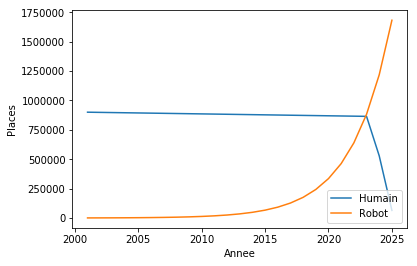

In [10]:
travailleur_agricole= {2006 : 902045, 2007:899094,2008:896143,2009:893192,2010:891239,
                       2011:890199,2012:889159,2013:888119,2014:887079,2015:886039,2016:885000}


robot_agricole = {2001:100,2002:1000,2003:2000,2004:3000,2005:4000,2006:6000, 
                 2007:8500,2008:11000,2009:14000,2010:17000,2011:20000,2012:23500,2013:28000
                 ,2014:30500,2015:34960}

evolution_travailleur_agricole = evolution_lineaire_dico(travailleur_agricole,30)
evolution_robot_agricole = evolution_expo_dico_2(robot_agricole,30)

(dhumain,drobot) = decroi_lineaire_to_expo(evolution_travailleur_agricole,evolution_robot_agricole)
deux_dico_to_graphic(drobot,dhumain,2000)

In [11]:
amazon_humain={2015:230800,2016:341400,2017:566000}
amazon_robot = {1:30000,2:45000, 3:120000}

In [12]:
evolution_amazon_robot=evolution_expo_dico_2(amazon_robot,7)
evolution_amazon_humain=evolution_lineaire_dico(amazon_humain,7)

L'intersection se situe en  2021


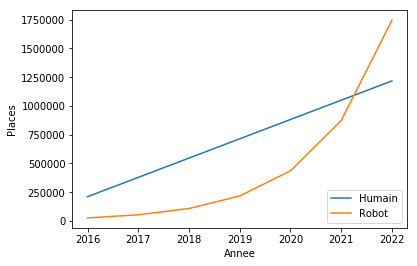

"Evolution du nombre de salarié chez amazon comparer à l'evolution de celui des robot "

In [13]:
deux_dico_to_graphic(evolution_amazon_robot,evolution_amazon_humain,2015)
"""Evolution du nombre de salarié chez amazon comparer à l'evolution de celui des robot """